<a href="https://colab.research.google.com/github/gaesu96/gaesu_public/blob/mm-detection/mmdetection_pet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mmdetection install

import torch

# 실습환경이 mmdetection 2.x 기준으로, pytorch 1.13.0으로 setting(mmdetection 2.x는 pytorch 2.0대를 지원하지 않음)
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116
# mmcv를 위해서 mmcv-full을 먼저 설치
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html
# mmdetection은 3.0 version이 출시되었으나, 실습 환경 상 2.x대로 설치
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 384.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 56.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.17.1+cu121
    Uninstalling torchvision-0.17.1+cu121:
      Successfully uninstalled torchvision-0.17.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu121 requires torch==2.2.1, but you have torch 1.13.0+cu116 which is incompatible.
torchdata 0.7.1 requires torch>=2, but you have torch 1.13.0+cu116 which is incompatible.
torchtext 0.17.1 requires torc

Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 5.4 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 38019, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 38019 (delta 39), reused 61 (delta 25), pack-reused 37917
Receiving objects: 100% (38019/38019), 63.24 MiB | 24.70 MiB/s, done.
Resolving deltas: 100% (26205/26205), done.
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.



In [1]:
from mmdet.apis import init_detector, inference_detector
import mmcv

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [2]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2024-04-27 08:35:40--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2024-04-27 08:35:40--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz [following]
--2024-04-27 08:35:40--  https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-str

In [3]:
!mkdir /content/data
!tar -xvf image.tar.gz -C /content/data
!tar -xvf annotations.tar.gz -C /content/data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
annotations/trimaps/._pomeranian_180.png
annotations/trimaps/pomeranian_180.png
annotations/trimaps/._pomeranian_181.png
annotations/trimaps/pomeranian_181.png
annotations/trimaps/._pomeranian_182.png
annotations/trimaps/pomeranian_182.png
annotations/trimaps/._pomeranian_183.png
annotations/trimaps/pomeranian_183.png
annotations/trimaps/._pomeranian_184.png
annotations/trimaps/pomeranian_184.png
annotations/trimaps/._pomeranian_185.png
annotations/trimaps/pomeranian_185.png
annotations/trimaps/._pomeranian_186.png
annotations/trimaps/pomeranian_186.png
annotations/trimaps/._pomeranian_187.png
annotations/trimaps/pomeranian_187.png
annotations/trimaps/._pomeranian_188.png
annotations/trimaps/pomeranian_188.png
annotations/trimaps/._pomeranian_189.png
annotations/trimaps/pomeranian_189.png
annotations/trimaps/._pomeranian_19.png
annotations/trimaps/pomeranian_19.png
annotations/trimaps/._pomeranian_190.png
annotations/trimaps/pomeranian_190.png
annota

In [4]:
!tar -xvf images.tar.gz -C /content/data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
images/american_bulldog_194.jpg
images/Birman_175.jpg
images/american_bulldog_178.jpg
images/staffordshire_bull_terrier_93.jpg
images/Egyptian_Mau_58.jpg
images/havanese_44.jpg
images/english_cocker_spaniel_97.jpg
images/Ragdoll_111.jpg
images/american_pit_bull_terrier_159.jpg
images/english_setter_134.jpg
images/english_setter_87.jpg
images/wheaten_terrier_198.jpg
images/pug_180.jpg
images/boxer_172.jpg
images/Sphynx_197.jpg
images/german_shorthaired_2.jpg
images/British_Shorthair_9.jpg
images/pug_89.jpg
images/japanese_chin_39.jpg
images/Ragdoll_20.jpg
images/american_bulldog_111.jpg
images/yorkshire_terrier_112.jpg
images/Persian_88.jpg
images/pug_9.jpg
images/Birman_40.jpg
images/British_Shorthair_272.jpg
images/havanese_7.jpg
images/pomeranian_154.jpg
images/beagle_49.jpg
images/British_Shorthair_94.jpg
images/Persian_90.jpg
images/staffordshire_bull_terrier_30.jpg
images/samoyed_113.jpg
images/english_cocker_spaniel_46.jpg
images/Abyssinian_22.

In [5]:
!cd /content/data/annotations; cat trainval.txt

Abyssinian_100 1 1 1
Abyssinian_101 1 1 1
Abyssinian_102 1 1 1
Abyssinian_103 1 1 1
Abyssinian_104 1 1 1
Abyssinian_105 1 1 1
Abyssinian_106 1 1 1
Abyssinian_107 1 1 1
Abyssinian_108 1 1 1
Abyssinian_109 1 1 1
Abyssinian_10 1 1 1
Abyssinian_110 1 1 1
Abyssinian_111 1 1 1
Abyssinian_112 1 1 1
Abyssinian_113 1 1 1
Abyssinian_114 1 1 1
Abyssinian_115 1 1 1
Abyssinian_116 1 1 1
Abyssinian_117 1 1 1
Abyssinian_118 1 1 1
Abyssinian_119 1 1 1
Abyssinian_11 1 1 1
Abyssinian_120 1 1 1
Abyssinian_121 1 1 1
Abyssinian_122 1 1 1
Abyssinian_123 1 1 1
Abyssinian_124 1 1 1
Abyssinian_125 1 1 1
Abyssinian_126 1 1 1
Abyssinian_127 1 1 1
Abyssinian_128 1 1 1
Abyssinian_129 1 1 1
Abyssinian_12 1 1 1
Abyssinian_130 1 1 1
Abyssinian_131 1 1 1
Abyssinian_132 1 1 1
Abyssinian_133 1 1 1
Abyssinian_134 1 1 1
Abyssinian_135 1 1 1
Abyssinian_136 1 1 1
Abyssinian_137 1 1 1
Abyssinian_138 1 1 1
Abyssinian_139 1 1 1
Abyssinian_13 1 1 1
Abyssinian_140 1 1 1
Abyssinian_141 1 1 1
Abyssinian_142 1 1 1
Abyssinian_143 1 

In [6]:
import pandas as pd
pet_df = pd.read_csv('/content/data/annotations/trainval.txt', sep=' ', header=None, names=['img_name', 'class_id', 'etc1', 'etc2', 'etc3'])
pet_df.head()

,img_name,class_id,etc1,etc2,etc3
0,Abyssinian_100,1,1,1,NaN
1,Abyssinian_101,1,1,1,NaN
2,Abyssinian_102,1,1,1,NaN
3,Abyssinian_103,1,1,1,NaN
4,Abyssinian_104,1,1,1,NaN


In [7]:
pet_df['class_id'].value_counts()

class_id
1     100
2     100
3     100
4     100
5     100
6     100
7     100
9     100
10    100
11    100
16    100
15    100
14    100
18    100
19    100
20    100
17    100
21    100
25    100
24    100
22    100
36    100
31    100
32    100
26    100
28    100
27    100
29    100
30    100
37    100
35    100
34    100
33     99
8      96
13     96
23     96
12     93
Name: count, dtype: int64

In [8]:
pet_df['class_name'] = pet_df['img_name'].apply(lambda x: x[:x.rfind('_')])

pet_df['class_name'].value_counts()

class_name
Abyssinian                    100
american_bulldog              100
american_pit_bull_terrier     100
basset_hound                  100
beagle                        100
Bengal                        100
Birman                        100
boxer                         100
British_Shorthair             100
chihuahua                     100
great_pyrenees                100
german_shorthaired            100
english_setter                100
japanese_chin                 100
keeshond                      100
leonberger                    100
havanese                      100
Maine_Coon                    100
pomeranian                    100
Persian                       100
miniature_pinscher            100
wheaten_terrier               100
scottish_terrier              100
shiba_inu                     100
pug                           100
Russian_Blue                  100
Ragdoll                       100
saint_bernard                 100
samoyed                       100
yor

In [9]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(pet_df, test_size=0.1, stratify=pet_df['class_id'], random_state=2021)

In [10]:
train_df = train_df.sort_values(by='img_name')
val_df = val_df.sort_values(by='img_name')

In [11]:
train_df.head()

,img_name,class_id,etc1,etc2,etc3,class_name
1895,Abyssinian_1,1,1,1,NaN,Abyssinian
10,Abyssinian_10,1,1,1,NaN,Abyssinian
1,Abyssinian_101,1,1,1,NaN,Abyssinian
2,Abyssinian_102,1,1,1,NaN,Abyssinian
3,Abyssinian_103,1,1,1,NaN,Abyssinian


In [12]:
import subprocess
import xml.dom.minidom

# 셸 명령어 실행
output = subprocess.check_output(["cat", "/content/data/annotations/xmls/Abyssinian_1.xml"])

# 바이너리로 반환된 결과를 문자열로 변환하여 저장
xml_content = output.decode("utf-8")

# XML 파싱
dom = xml.dom.minidom.parseString(xml_content)

# 보기 좋은 형식의 XML 문자열로 변환
pretty_xml_content = dom.toprettyxml()

# 결과 확인
print(pretty_xml_content)

<?xml version="1.0" ?>
<annotation>
	<folder>OXIIIT</folder>
	<filename>Abyssinian_1.jpg</filename>
	<source>
		<database>OXFORD-IIIT Pet Dataset</database>
		<annotation>OXIIIT</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>600</width>
		<height>400</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>cat</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<occluded>0</occluded>
		<bndbox>
			<xmin>333</xmin>
			<ymin>72</ymin>
			<xmax>425</xmax>
			<ymax>158</ymax>
		</bndbox>
		<difficult>0</difficult>
	</object>
</annotation>



In [13]:
train_df['img_name'].to_csv('/content/data/train_txt', sep=' ', header=False, index=False)
val_df['img_name'].to_csv('/content/data/val_txt', sep=' ', header=False, index=False)

In [14]:
pet_class_name = pet_df['class_name'].unique().tolist()
print(pet_class_name)

['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [15]:
import xml.etree.ElementTree as ET
import os
def get_bboxes_from_xml(anno_dir, xml_file):
  anno_xml_file = os.path.join(anno_dir, xml_file)
  tree = ET.parse(anno_xml_file)
  root = tree.getroot()
  bbox_names = []
  bboxes = []

  for obj in root.findall('object'):
    bbox_name = xml_file[: xml_file.rfind('_')]

    xmlbox = obj.find('bndbox')
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)

    bboxes.append([x1, y1, x2, y2])
    bbox_names.append(bbox_name)
  return bboxes, bbox_names

In [16]:
import copy
import mmcv
import numpy as np
import cv2
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

PET_CLASSES = pet_df['class_name'].unique().tolist()

@DATASETS.register_module(force=True)
class PetDataset(CustomDataset):
  CLASSES = PET_CLASSES

  def load_annotations(self, ann_file):
    data_infos = []
    cat2label = {k:i for i,k in enumerate(self.CLASSES)}
    img_list = mmcv.list_from_file(self.ann_file)

    for image_id in img_list:
      filename = image_id
      filename = f'{self.img_prefix}/{filename}.jpg'
      image = cv2.imread(filename)

      height, width = image.shape[:2]

      data_info = {'filename': filename,
                   'width': width,
                   'height': height}
      label_prefix = self.img_prefix.replace('images', 'annotations')
      anno_file = f'{label_prefix}/xmls/{str(image_id)}.xml'
      if not os.path.exists(anno_file):
        continue

      anno_dir = f'{label_prefix}/xmls'


      bboxes, bbox_names = get_bboxes_from_xml(anno_dir, str(image_id) + '.xml')

      gt_bboxes = []
      gt_labels = []
      gt_bboxes_ignore = []
      gt_labels_ignore = []

      for bbox, bbox_name in zip(bboxes, bbox_names):
        if bbox_name in cat2label:
          gt_bboxes.append(bbox)
          gt_labels.append(cat2label[bbox_name])

        else:
          gt_bboxes_ignore.append(bbox)
          gt_labels_ignore.append(-1)

      data_anno = {
          'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
          'labels': np.array(gt_labels, dtype=np.int64),
          'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
          'labels_ignore': np.array(gt_labels_ignore, dtype=np.int64)
      }

      data_info.update(ann=data_anno)
      data_infos.append(data_info)

    return data_infos


In [17]:
config_file = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = './mmdetection/checkpoint/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [18]:
!mkdir /content/mmdetection/checkpoint

In [19]:
!wget -O /content/mmdetection/checkpoint/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2024-04-27 08:36:04--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.199, 47.246.48.202, 47.246.48.204, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoint/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  56.0MB/s    in 2.8s    

2024-04-27 08:36:07 (56.0 MB/s) - ‘/content/mmdetection/checkpoint/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [20]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [21]:
import os, sys
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [22]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'   pet_work_dir   project_file


In [23]:
!mkdir /mydrive/pet_work_dir

mkdir: cannot create directory ‘/mydrive/pet_work_dir’: File exists


In [24]:
print(len(PET_CLASSES))

37


In [29]:
from mmdet.apis import set_random_seed

cfg.model.roi_head.bbox_head.num_classes = 37
cfg.dataset_type = 'PetDataset'
cfg.data_root = '/content/data/'

cfg.data.train.type = 'PetDataset'
cfg.data.train.data_root = '/content/data/'
cfg.data.train.ann_file = 'train_txt'
cfg.data.train.img_prefix = 'images'

cfg.data.val.data_root = '/content/data/'
cfg.data.val.type = 'PetDataset'
cfg.data.val.ann_file = 'val_txt'
cfg.data.val.img_prefix = 'images'

cfg.load_from = '/content/mmdetection/checkpoint/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

cfg.work_dir = '/mydrive/pet_work_dir'

cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 5

cfg.runner.max_epochs = 5

cfg.evaluation.metric = 'mAP'
cfg.evaluation.interval = 5

cfg.data.samples_per_gpu = 4

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

cfg.lr_config.policy = 'step'

cfg.device='cuda'

print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [30]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

datasets = [build_dataset(cfg.data.train)]

/usr/local/lib/python3.10/dist-packages/mmdet-2.28.2-py3.10.egg/mmdet/datasets/custom.py:181: UserWarning: CustomDataset does not support filtering empty gt images.
  warnings.warn(


In [27]:
datasets[0]


PetDataset Train dataset with number of images 3304, and instance counts: 
+-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
| category              | count | category                | count | category                      | count | category            | count | category                        | count |
+-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
| 0 [Abyssinian]        | 89    | 1 [american_bulldog]    | 90    | 2 [american_pit_bull_terrier] | 90    | 3 [basset_hound]    | 90    | 4 [beagle]                      | 90    |
| 5 [Bengal]            | 89    | 6 [Birman]              | 90    | 7 [Bombay]                    | 86    | 8 [boxer]           | 90    | 9 [British_Shorthair]           | 90    |
| 10 [chihuahua]        

In [31]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES
mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))

train_detector(model, datasets, cfg, distributed=False, validate=True)

2024-04-27 08:42:48,837 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2024-04-27 08:42:50,193 - mmdet - INFO - load checkpoint from local path: /content/mmdetection/checkpoint/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2024-04-27 08:42:50,362 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([38, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([38]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([148, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 367/367, 13.3 task/s, elapsed: 28s, ETA:     0s
---------------iou_thr: 0.5---------------


2024-04-27 09:13:03,127 - mmdet - INFO - 
+----------------------------+-----+------+--------+-------+
| class                      | gts | dets | recall | ap    |
+----------------------------+-----+------+--------+-------+
| Abyssinian                 | 10  | 68   | 0.800  | 0.296 |
| american_bulldog           | 10  | 69   | 1.000  | 0.734 |
| american_pit_bull_terrier  | 10  | 74   | 0.900  | 0.733 |
| basset_hound               | 10  | 60   | 1.000  | 0.817 |
| beagle                     | 10  | 86   | 0.900  | 0.591 |
| Bengal                     | 10  | 96   | 1.000  | 0.523 |
| Birman                     | 10  | 66   | 1.000  | 0.781 |
| Bombay                     | 10  | 72   | 0.900  | 0.731 |
| boxer                      | 10  | 104  | 1.000  | 0.394 |
| British_Shorthair          | 10  | 59   | 1.000  | 0.818 |
| chihuahua                  | 10  | 47   | 0.800  | 0.570 |
| Egyptian_Mau               | 9   | 55   | 0.889  | 0.433 |
| english_cocker_spaniel     | 10  | 69   |

/usr/local/lib/python3.10/dist-packages/mmdet-2.28.2-py3.10.egg/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


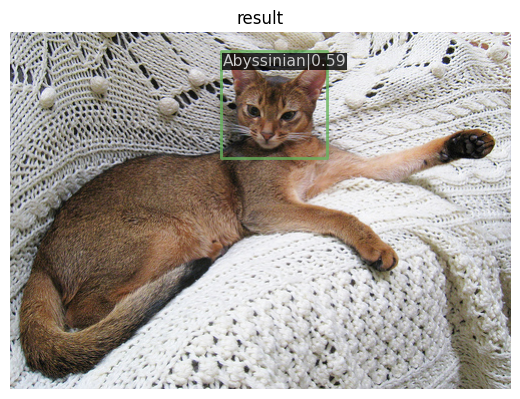

In [32]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

img = cv2.imread('/content/data/images/Abyssinian_88.jpg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr = 0.3)

load checkpoint from local path: /mydrive/pet_work_dir/epoch_5.pth


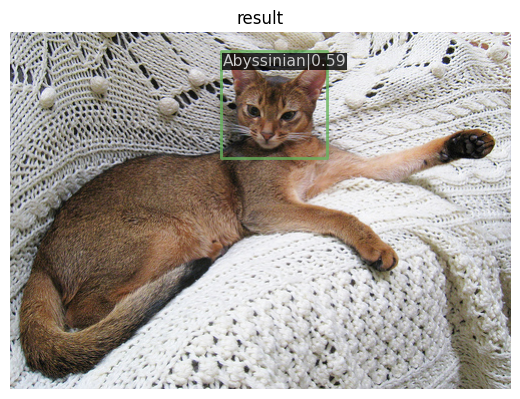

In [33]:
checkpoint_file = '/mydrive/pet_work_dir/epoch_5.pth'

model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

img = cv2.imread('/content/data/images/Abyssinian_88.jpg')

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr = 0.3)

In [41]:
val_df['img_path'] = '/content/data/images/' + val_df['img_name'] + '.jpg'
val_df.head()

,img_name,class_id,etc1,etc2,etc3,class_name,img_path
0,Abyssinian_100,1,1,1,NaN,Abyssinian,/content/data/images/Abyssinian_100.jpg
21,Abyssinian_11,1,1,1,NaN,Abyssinian,/content/data/images/Abyssinian_11.jpg
24,Abyssinian_122,1,1,1,NaN,Abyssinian,/content/data/images/Abyssinian_122.jpg
29,Abyssinian_127,1,1,1,NaN,Abyssinian,/content/data/images/Abyssinian_127.jpg
44,Abyssinian_140,1,1,1,NaN,Abyssinian,/content/data/images/Abyssinian_140.jpg


In [42]:
val_paths = val_df[val_df['img_path'].str.contains('Abyssinian')]['img_path'].values
val_imgs = [cv2.imread(x) for x in val_paths]
print(val_paths[8])

/content/data/images/Abyssinian_190.jpg


In [43]:
results = inference_detector(model_ckpt, val_imgs)